In [2]:
import networkx as nx 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('seealsology_data.tsv',sep = '\t')

In [4]:
data.head()

,source,target,depth
0,life insurance,corporate-owned life insurance,1
1,life insurance,critical illness insurance,1
2,life insurance,economic capital,1
3,life insurance,estate planning,1
4,life insurance,false insurance claims,1


In [5]:
data.shape

(3744, 3)

In [8]:
data.head()

,source,target,depth
0,life insurance,corporate-owned life insurance,1
1,life insurance,critical illness insurance,1
2,life insurance,economic capital,1
3,life insurance,estate planning,1
4,life insurance,false insurance claims,1


In [6]:
G=nx.from_pandas_edgelist(data, "source", "target", edge_attr=True, create_using=nx.Graph())

In [7]:
len(G)#查看节点个数

2399

D:\Program Files\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
D:\Program Files\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


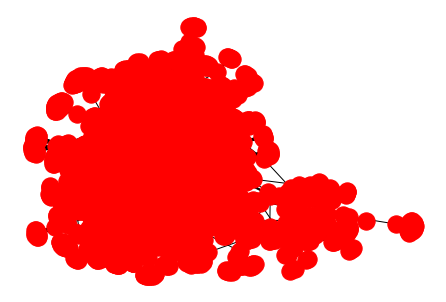

In [9]:
nx.draw(G)
plt.show()

In [10]:
from node2vec import Node2Vec
model = Node2Vec(G,walk_length = 10 ,num_walks = 5,p = 0.25,q = 4,workers = 1)

Generating walks (CPU: 1): 100%|█████████████████████████████████████████████████████████| 5/5 [00:03<00:00,  1.36it/s]


In [11]:
result = model.fit(window = 4,iter = 20)

In [12]:
print(result.wv.most_similar('critical illness insurance'))

[('total permanent disability insurance', 0.989175021648407), ('tontine', 0.8460999131202698), ('life insurance', 0.8456048965454102), ('return of premium life insurance', 0.8251887559890747), ("servicemembers' group life insurance", 0.8122134208679199), ('internal revenue code section 79', 0.8055813908576965), ('rand health insurance experiment', 0.784622073173523), ('medicaid estate recovery', 0.7834007740020752), ('permanent life insurance', 0.7803989052772522), ('family income benefit insurance', 0.7595686912536621)]


In [13]:
embeddings = result.wv
print(embeddings)

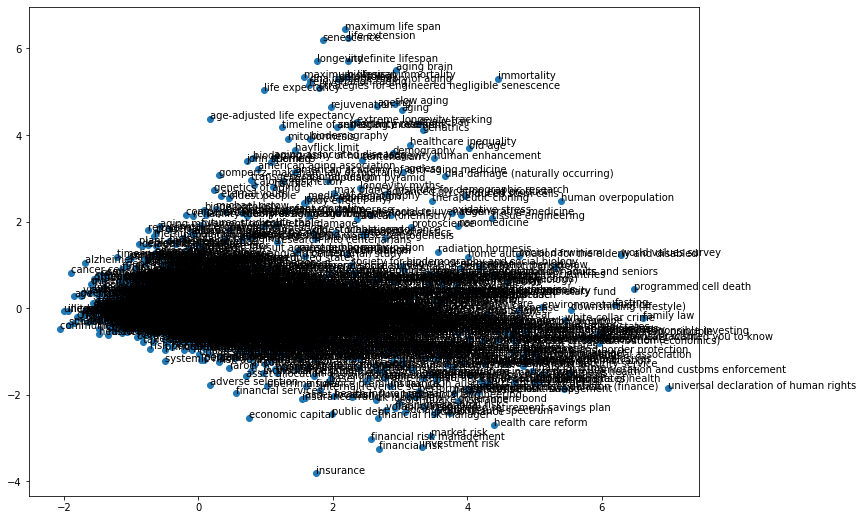

In [14]:
from sklearn.decomposition import PCA
def plt_nodes(word_list):
    X = []
    for item in word_list:
        X.append(embeddings[item])
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    plt.figure(figsize=(12,9))
    plt.scatter(result[:,0],result[:,1])
    for i,word in enumerate(list(word_list)):
        plt.annotate(word,xy = (result[i,0],result[i,1]))
    plt.show()

    
plt_nodes(result.wv.vocab)